# 作成したモデルの性能評価

このNBでは、作成したモデルのクラス (model_ResCNN.py) の性能評価を行います。  

このNBでは RY_module を使用します。  

使用するデータ 
- train data
  - Exp:06 , Loc:01~06, Dirc:left/right
  - Exp:11 , Loc:01~06, Dirc:left/right
- test data
  - Exp:02,03,04,05 , Loc:01~06, Dirc:left/right > A
  - Exp:07,08,09,10 , Loc:01_06, Dirc:left/right > B
 

# module import

In [2]:
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn

In [3]:
# my module import
lib_path = '/work-hmcomm/project/nedo2020_yokogawa/Git/yokogawa_ryamaguchi/nedo2020-yokogawass/script/RY_module/'
sys.path.insert(0,lib_path)
import make_dataset

In [4]:
sys.path

['/work-hmcomm/project/nedo2020_yokogawa/Git/yokogawa_ryamaguchi/nedo2020-yokogawass/script/RY_module/',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '',
 '/home/user/.local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/home/user/.ipython']

# image data load


In [5]:
train_df, test_A_df, test_B_df = make_dataset.make_dataset()

data set size

train_arr_list len: 24
train_arr_list shape: (128, 4105)
test_A_arr_list len: 48
test_A_arr_list shape: (128, 1655)
test_B_arr_list len: 48
test_B_arr_list shaoe: (128, 1985)


******************************
train_df : 24


,ExperimentID,LocationID,feat_arr,flow_array
0,Exp06,1,"[[24.944572, 32.575592, 33.89266, 26.675941, 1...","[3.8037, 3.7438, 3.8389, 3.8169999999999997, 3..."
1,Exp06,1,"[[33.48709, 29.66965, 33.91611, 19.573078, 19....","[3.8037, 3.7438, 3.8389, 3.8169999999999997, 3..."
2,Exp11,1,"[[3.241026, 2.7773824, 4.7408237, 5.61394, 4.1...","[3.7785, 3.8101, 3.8013, 3.8294, 3.8037, 3.901..."
3,Exp11,1,"[[2.7407713, 1.9377644, 3.4942484, 4.0883603, ...","[3.7785, 3.8101, 3.8013, 3.8294, 3.8037, 3.901..."
4,Exp06,2,"[[44.496002, 37.869476, 44.106045, 38.742172, ...","[3.8037, 3.7438, 3.8389, 3.8169999999999997, 3..."


test_A_df : 48


,ExperimentID,LocationID,feat_arr,flow_array
0,Exp02,1,"[[22.189404, 42.409466, 19.280546, 46.367435, ...","[1.0778, 1.075, 1.0973, 1.0714, 1.0933, 1.0695..."
1,Exp02,1,"[[21.73746, 37.00212, 20.200304, 45.25262, 33....","[1.0778, 1.075, 1.0973, 1.0714, 1.0933, 1.0695..."
2,Exp03,1,"[[33.111393, 24.779707, 28.962976, 27.336609, ...","[2.1021, 2.0853, 2.0981, 2.0353, 1.9595, 2.049..."
3,Exp03,1,"[[35.648285, 16.300127, 27.777254, 24.465906, ...","[2.1021, 2.0853, 2.0981, 2.0353, 1.9595, 2.049..."
4,Exp04,1,"[[19.35442, 32.459236, 45.31466, 17.195143, 16...","[3.0088, 2.9945, 2.9986, 2.9945, 2.9921, 2.991..."


test_B_df : 48


,ExperimentID,LocationID,feat_arr,flow_array
0,Exp07,1,"[[2.9829905, 4.4594088, 4.138416, 4.1668386, 3...","[1.074, 1.1751, 1.0859, 1.1558, 1.065, 1.0557,..."
1,Exp07,1,"[[2.3817904, 3.7434857, 2.923259, 3.1937163, 2...","[1.074, 1.1751, 1.0859, 1.1558, 1.065, 1.0557,..."
2,Exp08,1,"[[4.735025, 3.953198, 1.6113248, 2.2921784, 2....","[2.0239, 2.0967, 2.0784, 2.1164, 2.0779, 2.061..."
3,Exp08,1,"[[4.649658, 4.277804, 2.0549674, 2.701288, 3.7...","[2.0239, 2.0967, 2.0784, 2.1164, 2.0779, 2.061..."
4,Exp09,1,"[[1.3941437, 1.1230211, 1.9428302, 1.7970701, ...","[2.9672, 3.0192, 3.0197, 3.0073, 3.0516, 2.926..."


None

None

None

In [30]:
train_x = [i[1]['feat_arr'] for i in train_df.iterrows()]
train_y = [i[1]['flow_array'] for i in train_df.iterrows()]


# Train

---
使用するデータたち  
- 学習データ   
train_feat_arr_list, train_flow_arr_list  
- テストデータ  
test_A_feat_arr_list, test_A_flow_arr_list  
test_B_feat_arr_list, test_B_flow_arr_list  

## class の intance化

In [26]:
from model import model_ResCNN

In [27]:
model = model_ResCNN.model_CNN_Res(config_path='./config_32.yml')

GPU available

GPU id : 1


/work-hmcomm/project/nedo2020_yokogawa/Git/yokogawa_ryamaguchi/nedo2020-yokogawass/script/RY_module/model/model_ResCNN.py:71: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


In [28]:
model.net

ResNetCNN(
  (cnn_blocks): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU(inplace)
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ResBlock(
      (conv): Sequential(
        (0): ReLU(inplace)
        (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU(inplace)
        (4): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (7): ResBlock(
      (conv): Sequential(
        (0): ReLU(inplace)
        (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (2): BatchNorm2d(32,

## model fit

In [31]:
model.fit(train_x, train_y)

init weights
Completed: [==============================] 100%  20/20 Epoch [1/500], train_loss: 7.4273, valid_loss: 8.6866
Saving Model to /work-hmcomm/project/nedo2020_yokogawa/Git/yokogawa_ryamaguchi/nedo2020-yokogawass/private_ry/CNN_model_test/output/32_module_run_test.h5
early_stop_count: 0/50
epoch: 1
Completed: [==============================] 100%  20/20 Epoch [2/500], train_loss: 4.6901, valid_loss: 5.2642
Saving Model to /work-hmcomm/project/nedo2020_yokogawa/Git/yokogawa_ryamaguchi/nedo2020-yokogawass/private_ry/CNN_model_test/output/32_module_run_test.h5
early_stop_count: 0/50
epoch: 2
Completed: [==============================] 100%  20/20 Epoch [3/500], train_loss: 2.5723, valid_loss: 0.4640
Saving Model to /work-hmcomm/project/nedo2020_yokogawa/Git/yokogawa_ryamaguchi/nedo2020-yokogawass/private_ry/CNN_model_test/output/32_module_run_test.h5
early_stop_count: 0/50
epoch: 3
Completed: [==============================] 100%  20/20 Epoch [4/500], train_loss: 1.2304, valid_lo

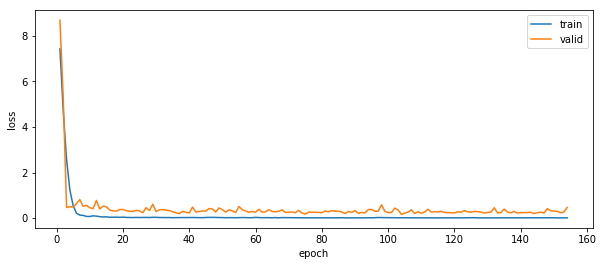

In [32]:
model.plot_learnig_curve()

# Predict

### 学習データに対してpredict
確認のため最初のtrain dataに対して予測

In [33]:
pred_train = []
for i in range(len(train_x)):
    y_pred, y_test = model.predict(train_x[i], train_y[i])
    pred_train.append((y_pred, y_test))
    break

Loading Weights


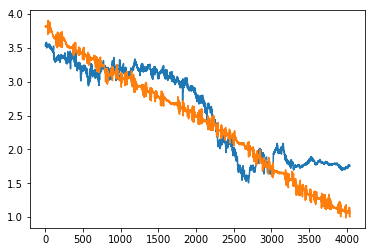

In [34]:
plt.plot(pred_train[0][0])
plt.plot(pred_train[0][1])

### テストデータに対してpredict

In [35]:
pred_A = [(model.predict(arr[1]['feat_arr'], arr[1]['flow_array'])) for arr in test_A_df.iterrows()]

Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights


In [36]:
pred_B = [(model.predict(arr[1]['feat_arr'], arr[1]['flow_array'])) for arr in test_B_df.iterrows()]

Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights
Loading Weights


### predict結果

In [41]:
test_A_df.columns

Index(['ExperimentID', 'LocationID', 'feat_arr', 'flow_array'], dtype='object')

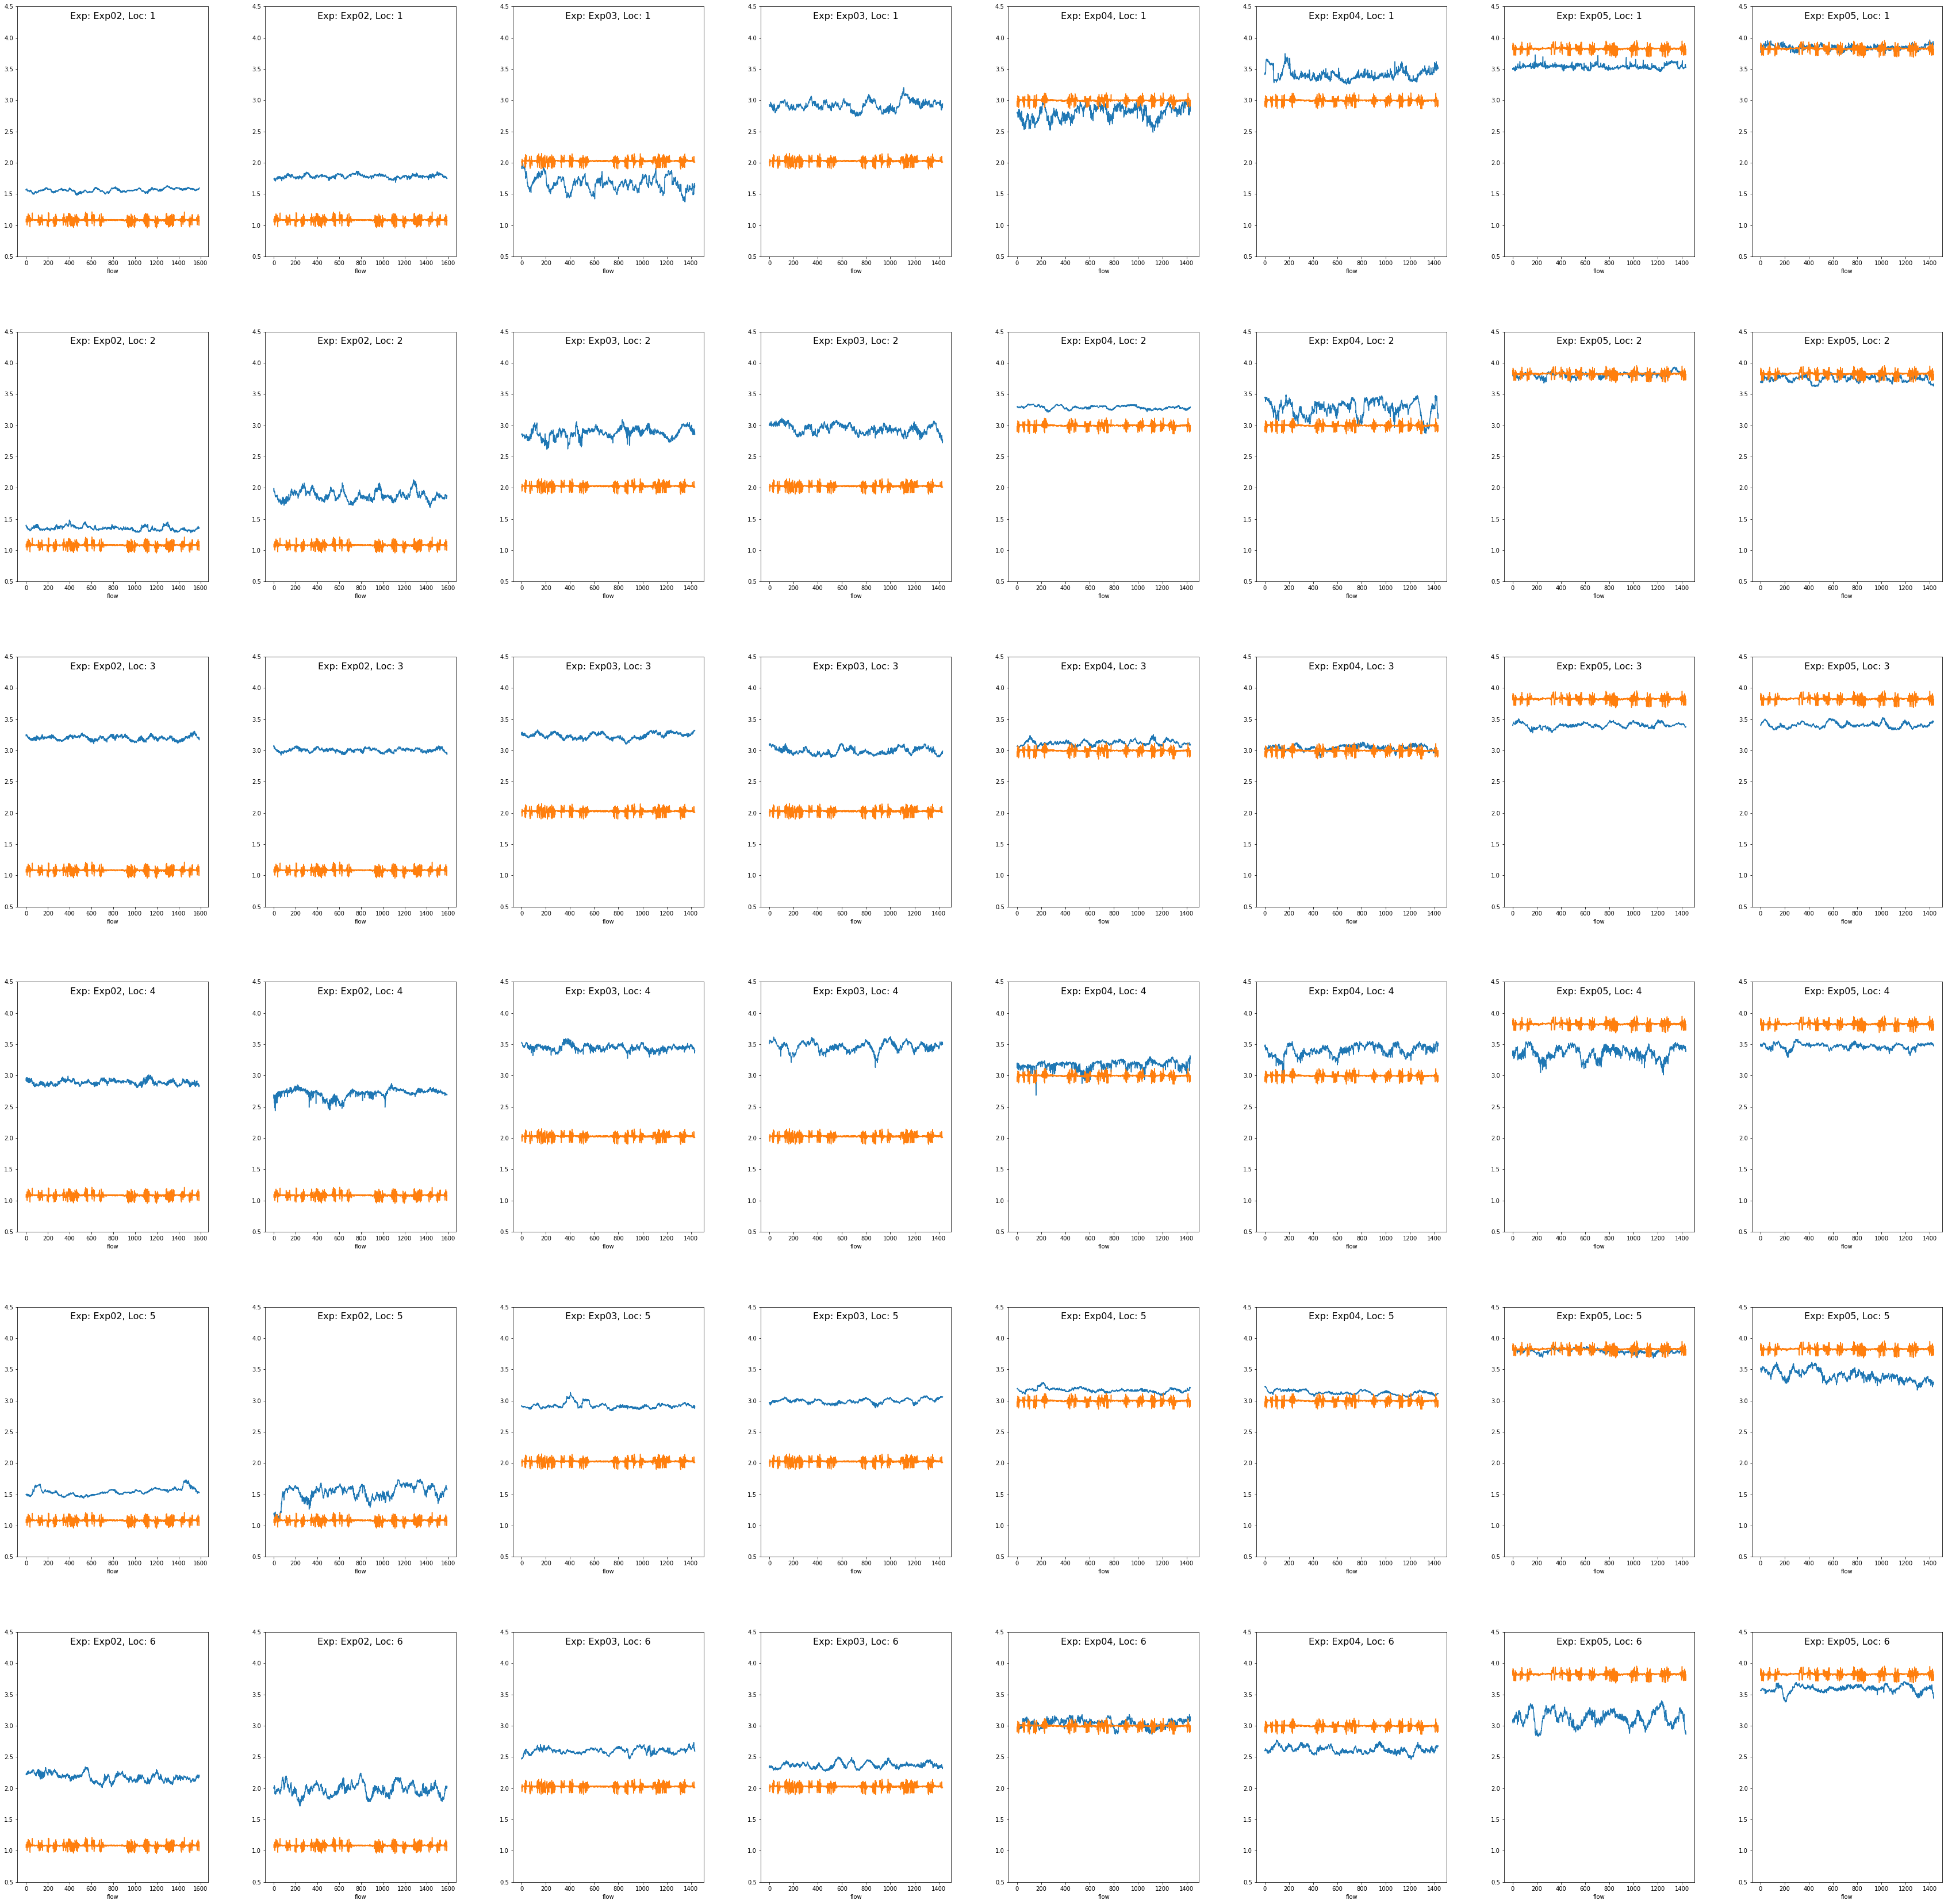

In [42]:
rows_count = 6 # Exp
columns_count =  8 #location
graphs_count = rows_count * columns_count # グラフ6個(2*3)
axes = [] # axesオブジェクト保持用
x = np.linspace(-1, 1, 100) # x軸データ
fig = plt.figure(figsize=(60,60 )) # figureオブジェクト作成
for i in range(1, graphs_count + 1):
    axes.append(fig.add_subplot(rows_count, columns_count, i)) # 順序i番目のAxes追加
    axes[i-1].plot(pred_A[i-1][0])
    axes[i-1].plot(pred_A[i-1][1])
#     axes[i-1].set_xlabel('point')
    axes[i-1].set_xlabel('flow')
    axes[i-1].set_ylim(0.5,4.5)
    #テキスト挿入
#     plot_memo = f'{result_list[i-1][0]}_Loc:{result_list[i-1][1]}_mic:{result_list[i-1][2]}\nmse:{result_list[i-1][3]:2f}, r2:{result_list[i-1][4]:2f}'
    exp = test_A_df.iloc[i-1,0]
    loc = test_A_df.iloc[i-1,1]
#     direc = test_A_name_list[i-1].split('_')[6]
    plot_memo = f'Exp: {exp}, Loc: {loc}' 
    axes[i-1].annotate(plot_memo, xy=(0.5, 0.95), fontsize=16, xycoords='axes fraction', horizontalalignment='center')
fig.subplots_adjust(wspace=0.3, hspace=0.3) # グラフ間の隙間調整
plt.show()


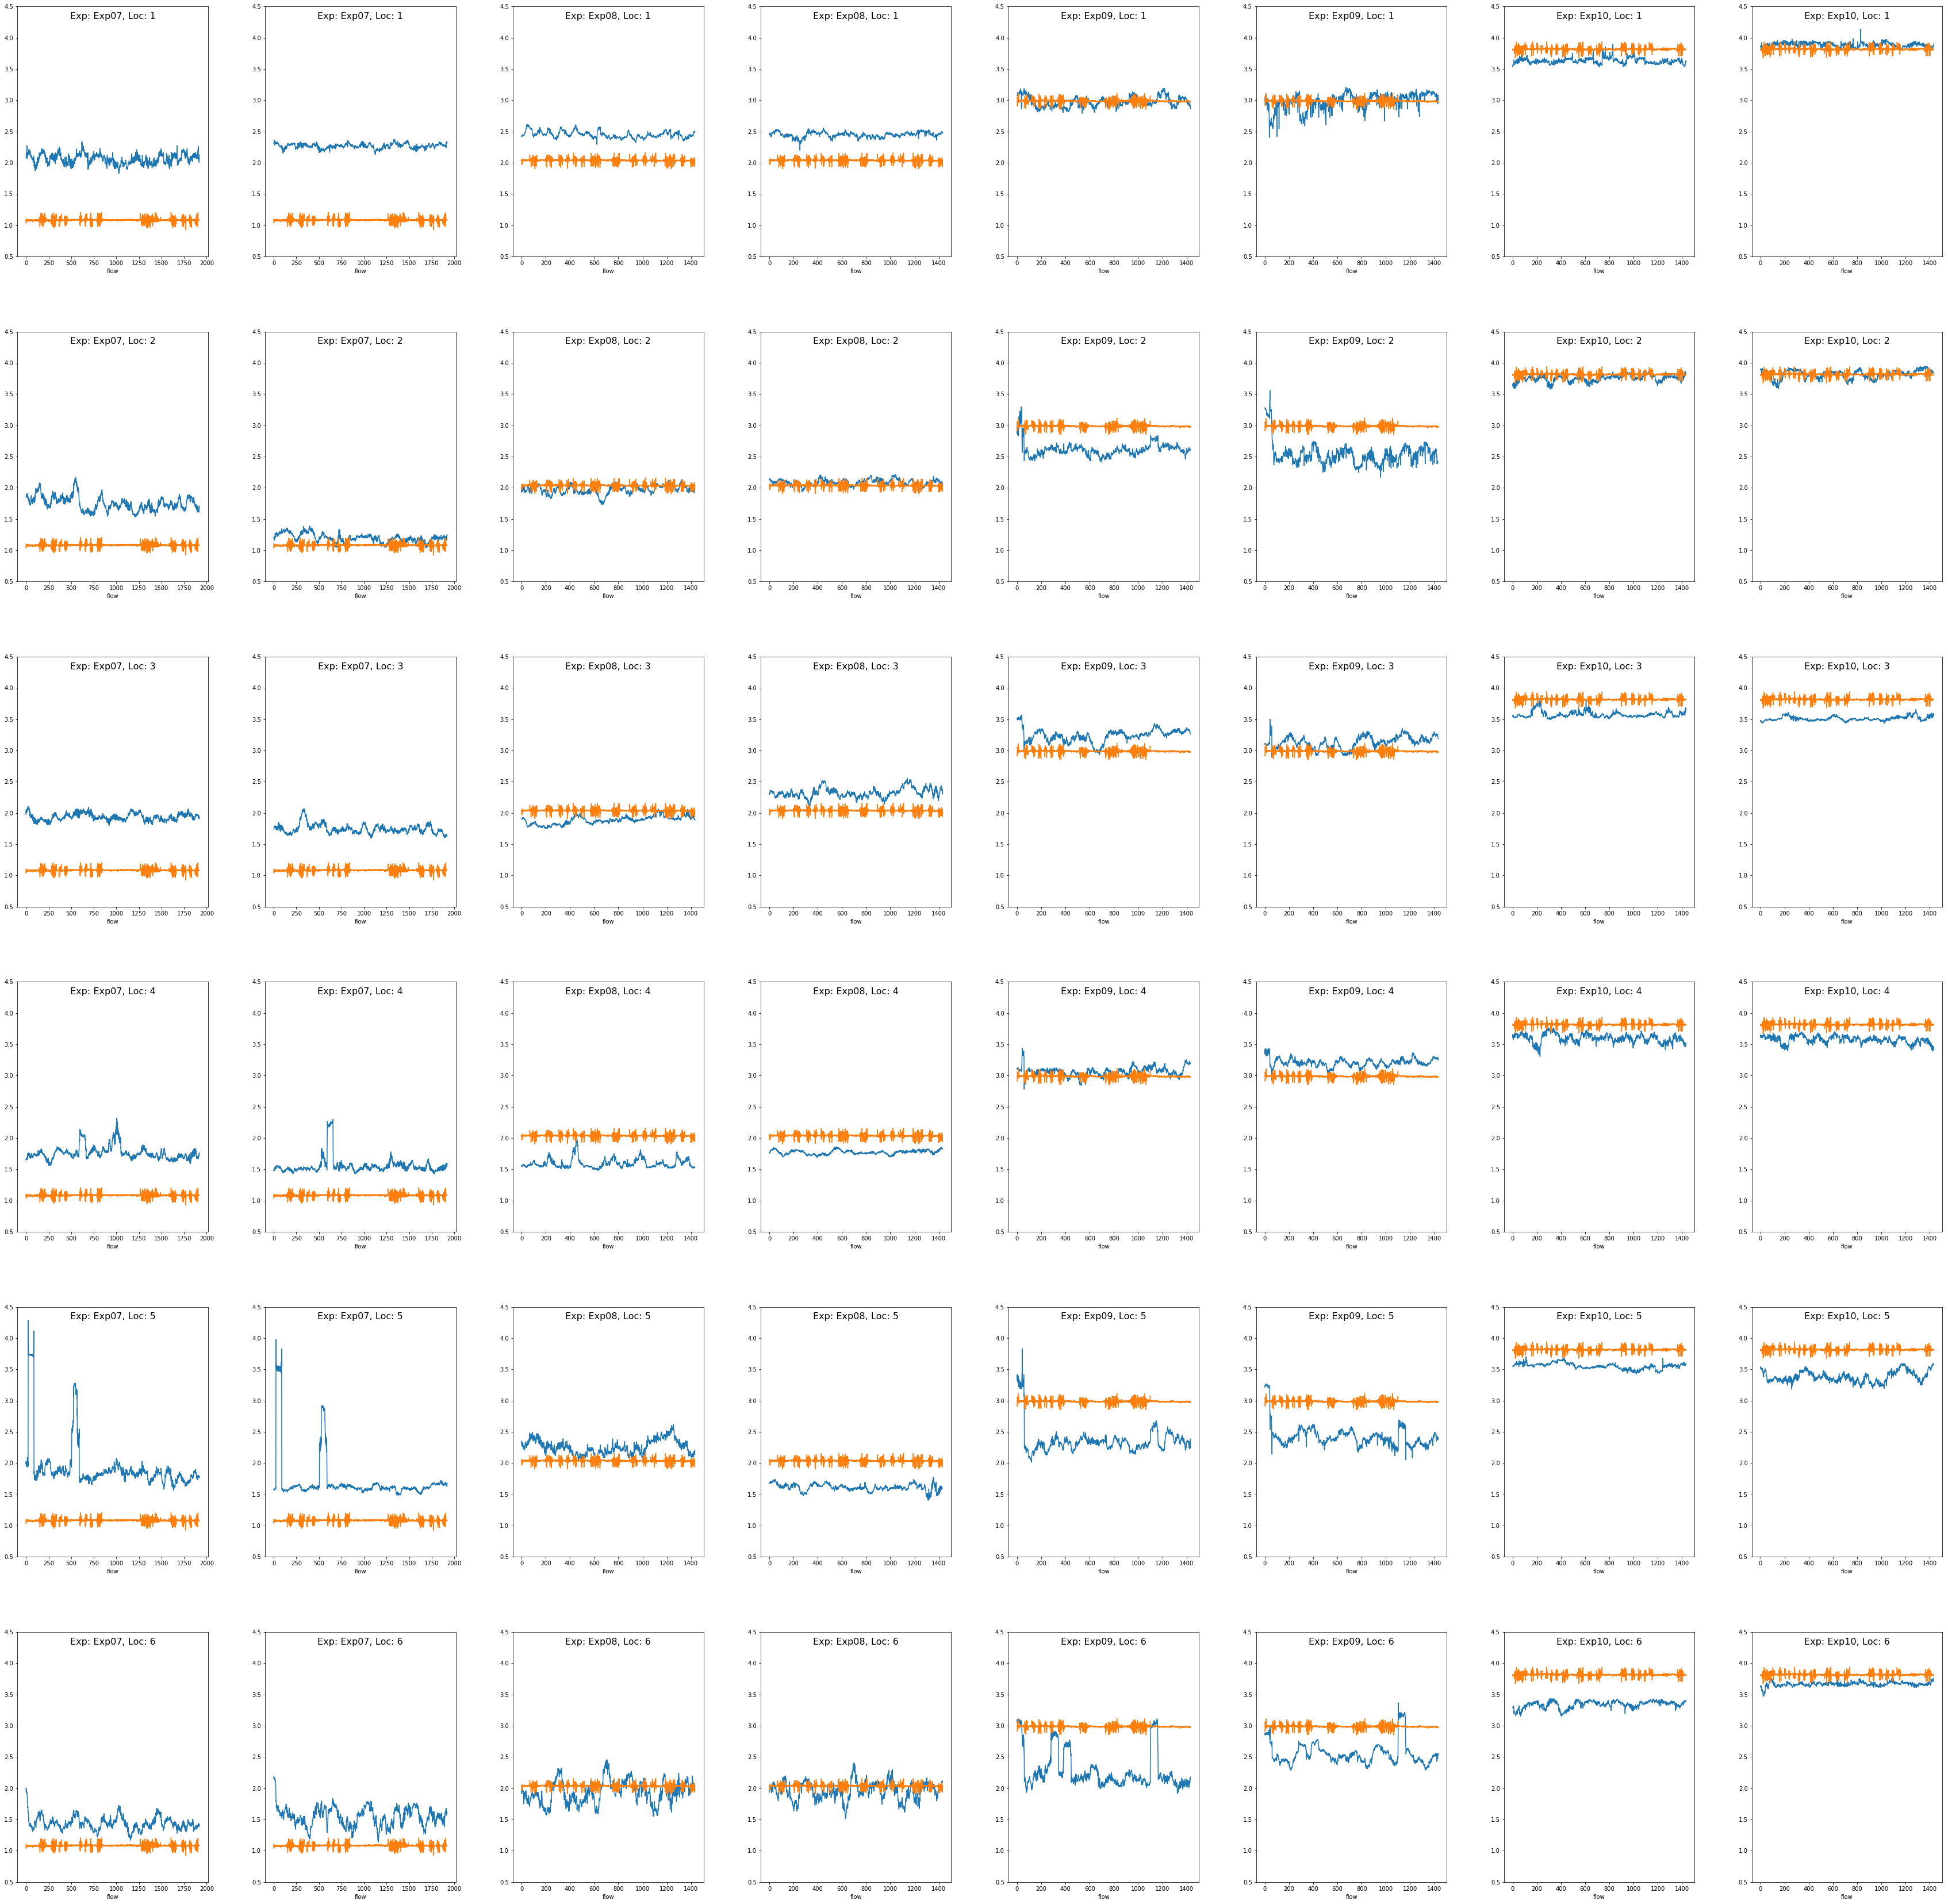

In [44]:
rows_count = 6 # Exp
columns_count =  8 #location
graphs_count = rows_count * columns_count # グラフ6個(2*3)
axes = [] # axesオブジェクト保持用
x = np.linspace(-1, 1, 100) # x軸データ
fig = plt.figure(figsize=(60,60 )) # figureオブジェクト作成
for i in range(1, graphs_count + 1):
    axes.append(fig.add_subplot(rows_count, columns_count, i)) # 順序i番目のAxes追加
    axes[i-1].plot(pred_B[i-1][0])
    axes[i-1].plot(pred_B[i-1][1])
#     axes[i-1].set_xlabel('point')
    axes[i-1].set_xlabel('flow')
    axes[i-1].set_ylim(0.5,4.5)
    #テキスト挿入
#     plot_memo = f'{result_list[i-1][0]}_Loc:{result_list[i-1][1]}_mic:{result_list[i-1][2]}\nmse:{result_list[i-1][3]:2f}, r2:{result_list[i-1][4]:2f}'
    exp = test_B_df.iloc[i-1,0]
    loc = test_B_df.iloc[i-1,1]
#     direc = test_A_name_list[i-1].split('_')[6]
    plot_memo = f'Exp: {exp}, Loc: {loc}' 
    axes[i-1].annotate(plot_memo, xy=(0.5, 0.95), fontsize=16, xycoords='axes fraction', horizontalalignment='center')
fig.subplots_adjust(wspace=0.3, hspace=0.3) # グラフ間の隙間調整
plt.show()


# Calculation score

In [45]:
scores_A = np.array([model.calc_score(i[0], i[1]) for i in pred_A])
scores_B = np.array([model.calc_score(i[0], i[1]) for i in pred_B])


MAPE score : 44.16
MAAPE score : 41.5
MAPE score : 64.68
MAAPE score : 57.3
MAPE score : 17.75
MAAPE score : 17.52
MAPE score : 44.08
MAAPE score : 41.46
MAPE score : 6.67
MAAPE score : 6.65
MAPE score : 13.81
MAAPE score : 13.71
MAPE score : 7.44
MAAPE score : 7.43
MAPE score : 1.15
MAAPE score : 1.15
MAPE score : 24.98
MAAPE score : 24.42
MAPE score : 73.26
MAAPE score : 62.98
MAPE score : 41.88
MAAPE score : 39.6
MAPE score : 45.13
MAAPE score : 42.33
MAPE score : 9.65
MAAPE score : 9.62
MAPE score : 9.29
MAAPE score : 9.25
MAPE score : 1.06
MAAPE score : 1.06
MAPE score : 2.23
MAAPE score : 2.23
MAPE score : 195.4
MAAPE score : 109.7
MAPE score : 177.42
MAAPE score : 105.67
MAPE score : 59.55
MAAPE score : 53.67
MAPE score : 47.37
MAAPE score : 44.19
MAPE score : 4.12
MAAPE score : 4.12
MAPE score : 1.85
MAAPE score : 1.85
MAPE score : 11.06
MAAPE score : 11.01
MAPE score : 10.93
MAAPE score : 10.88
MAPE score : 166.87
MAAPE score : 102.99
MAPE score : 150.54
MAAPE score : 98.3
MAP

## Average for each directionaly / location

In [249]:
scores_A_reshape = np.array(scores_A).reshape(6,4,2,2)
scores_B_reshape = np.array(scores_B).reshape(6,4,2,2)

scores_A_lr_loc_mean = np.mean(scores_A_reshape, axis=(0,2)).round(2)
scores_B_lr_loc_mean = np.mean(scores_B_reshape, axis=(0,2)).round(2)
print(f'score A')
display(scores_A_lr_loc_mean)
print(f'score B')
display(scores_B_lr_loc_mean)

score A


array([[97.11, 69.14],
       [44.41, 40.92],
       [ 7.47,  7.44],
       [ 7.66,  7.62]])

score B


array([[60.8 , 51.87],
       [12.55, 12.41],
       [11.5 , 11.37],
       [ 5.99,  5.98]])

# Visualize and output score

MAPE mean : 39.16
MAAPE mean : 31.28


,MAPE,MAAPE
1.0,97.1100,69.14
2.0,44.4100,40.92
3.0,7.4700,7.44
3.9,7.6600,7.62
mean,39.1625,31.28


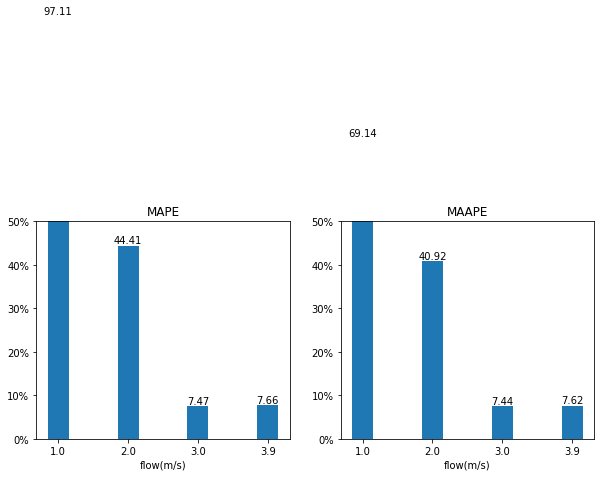

In [245]:
output_path = './output_score/'
output_name_ = 'test'

model.visualize_score(scores_A_lr_loc_mean, f'{output_path}{output_name_}_A_')
model.visualize_score(scores_B_lr_loc_mean, f'{output_path}{output_name_}_B_')

In [25]:
scores_A_mean

NameError: name 'scores_A_mean' is not defined